In [2]:
import math
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
import seaborn as sns

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

In [3]:
TravelInsurance= pd.read_csv('TravelInsurancePrediction.csv')

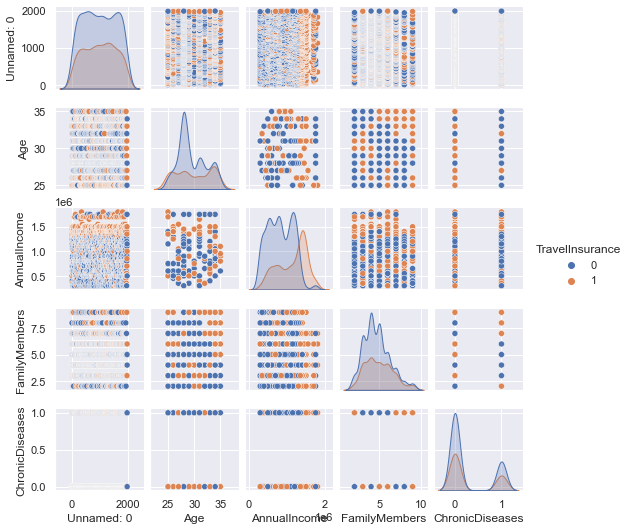

In [6]:
import seaborn as sns; sns.set()
sns.pairplot(TravelInsurance, hue='TravelInsurance', height=1.5);

In [4]:
TravelInsurance.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
TravelInsurance['GraduateOrNot'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['FrequentFlyer'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['EverTravelledAbroad'].replace({"Yes" :1 , "No": 0}, inplace=True)
TravelInsurance['Employment Type'].replace({"Government Sector" :1 , "Private Sector/Self Employed": 0}, inplace=True)

In [6]:
TravelInsurance.corr(method='pearson')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,0.115134,1.000000,0.127133,-0.349157,0.003354,0.011553,-0.143790,-0.181098,-0.147847
GraduateOrNot,0.027125,0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,-0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,-0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,-0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,-0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


We see that between the EverTravelledAbroad featueres is the one with the highest correlation with the labels, so in the first attempt we will not use it

In [15]:
y=TravelInsurance['TravelInsurance']
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

In [17]:
list_of_features=['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers','ChronicDiseases', 'FrequentFlyer']

In [20]:
X=TravelInsurance[list_of_features]
X

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer
0,31,1,1,400000,6,1,0
1,31,0,1,1250000,7,0,0
2,34,0,1,500000,4,1,0
3,28,0,1,700000,3,1,0
4,28,0,1,700000,8,1,1
...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,0,1
1983,28,0,1,1750000,5,1,0
1984,28,0,1,1150000,6,1,0
1985,34,0,1,1000000,6,0,1


In [26]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5) 

We split the dataset in two, one half will be used to train the model, the other will we used to check his accuracy, the we split the role of the two datasets to compute an average accuracy

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.6599597585513078

In [32]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.6253776435045317, 0.6599597585513078)

In [36]:
AveargageAccuracy=(accuracy_score(y1, y1_model)+ accuracy_score(y2, y2_model))/2
print(round(AveargageAccuracy, 4))

0.6427


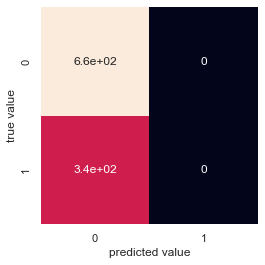

In [52]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y2, y2_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

The final accuracy obtained utilizing this method is rouglhy 64%

Let's try to include the EverTraveledAbroad feature

In [15]:
list_of_features2=['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers','ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

In [17]:
y=TravelInsurance['TravelInsurance']
X_new=TravelInsurance[list_of_features2]

In [40]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X_new, y, random_state=0,
                                  train_size=0.5) 

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print(accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))
print(precision_recall_fscore_support(y1, y1_model, zero_division=1))
print(precision_recall_fscore_support(y1, y1_model, zero_division=0))

0.6253776435045317 0.6599597585513078
(array([0.62537764, 1.        ]), array([1., 0.]), array([0.76951673, 0.        ]), array([621, 372], dtype=int64))
(array([0.62537764, 0.        ]), array([1., 0.]), array([0.76951673, 0.        ]), array([621, 372], dtype=int64))


In [48]:
AveargageAccuracy=(accuracy_score(y1, y1_model)+ accuracy_score(y2, y2_model))/2
print(round(AveargageAccuracy, 4))

0.6427


The resulting accuracy is the same, let's try using more data to train the model, using a five-fold cross-validation, in which 4/5 of the dataset are used to train the model, and the other 1/5 is used to test it, changing which portion of the dataset is used as a train or as a test 5 times.

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_new, y, cv=5)

array([0.64321608, 0.64321608, 0.64231738, 0.64231738, 0.64231738])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_new, y, cv=10)

array([0.64321608, 0.64321608, 0.64321608, 0.64321608, 0.64321608,
       0.64321608, 0.64321608, 0.64141414, 0.64141414, 0.64141414])

let's try to utilize only the binary (1 or 0) features to see if there is an improvement on the accuracy

In [7]:
list_of_features3=['Employment Type', 'GraduateOrNot','ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

In [8]:
y=TravelInsurance['TravelInsurance']
X_new2=TravelInsurance[list_of_features3]

In [9]:
X_new2

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1,1,1,0,0
1,0,1,0,0,0
2,0,1,1,0,0
3,0,1,1,0,0
4,0,1,1,1,0
...,...,...,...,...,...
1982,0,1,0,1,1
1983,0,1,1,0,1
1984,0,1,1,0,0
1985,0,1,0,1,1


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

In [36]:
from sklearn.model_selection import cross_val_score
x=sum(cross_val_score(model, X_new2, y, cv=5))

In [39]:
round((x/5) , 4)

0.7514

In [50]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X_new2, y, random_state=0,
                                  train_size=0.5) 

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print(accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))
print(precision_recall_fscore_support(y1, y1_model, zero_division=1))
print(precision_recall_fscore_support(y1, y1_model, zero_division=0))

0.7452165156092648 0.7575452716297787
(array([0.72716049, 0.82513661]), array([0.94847021, 0.40591398]), array([0.82320056, 0.54414414]), array([621, 372], dtype=int64))
(array([0.72716049, 0.82513661]), array([0.94847021, 0.40591398]), array([0.82320056, 0.54414414]), array([621, 372], dtype=int64))
